# How Has The Game Changed in Professional Basketaball?

Ethan Jaffee, Christopher Witte, Ashwin Rajan

# Part 1: Intro

### Section 1.1: Project Intro
In our final tutorial we will be analyzing data from NBA games between 2004 and 2021 to see how the sport has changed and will apply knowledge we gained in CMSC320 to gain a deeper insight into how professional basketball has evolved between the early 2000s and now.

### Section 1.2: Background Info

The NBA, the National Basketball Association, is the world’s foremost professional basketball league and features some of the world's greatest athletes. Like other sports the NBA has undergone a statistical revolution, in which coaches and players have begun analyzing the sport using statistics in an attempt to improve and make the game more efficient. If you are interested in the specifics of this we recommend you read this article https://qz.com/1104922/data-analytics-have-revolutionized-the-nba/ . By looking at the outcomes of games over the years we hope to be able to see how this change has affected the game and what specific aspects of the game have been changed. 



### Section 1.3: Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 2: The Data

### Section 2.1: What is our data?
Our data is the outcome of every game starting in the 2004 season until now. It includes data such as the score from each team and the FG% (Shots taken over shots made), 3FG%(Three point shots taken over three point shots made), and FT% (Free throws made over free throws taken). We go this dataset from Kaggel, the link to the data is https://www.kaggle.com/nathanlauga/nba-games?select=games.csv if you would like to download it for yourself. We will be looking at the games.csv file because we feel it best gives us the information we need to answer our questions, but there are some other interesting files if you want to do your own projects!  

### Section 2.1: Getting started!

The first thing we will do is take our csv and load it into a pandas dataframe, luckily pandas has a built in method to help us do that!

In [7]:
df = pd.read_csv("games.csv")
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1


Next we are going to add some columns to help with our analysis later. We are going to combine the home and away score for each game to have the total score for each game. We will also add a column that has just the year the game is played.


In [8]:
df['total_score'] = df['PTS_home'] + df['PTS_away']
def to_integer(dt_time):
    return 1 *dt_time.year
df['year'] = to_integer(pd.to_datetime(df['GAME_DATE_EST']).dt)
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,total_score,year
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1,184.0,2021
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1,186.0,2021
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1,209.0,2021
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1,208.0,2021
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1,211.0,2021


# Part 3: Analysis and Visuals  

Here we are going to make some plots to see how the data changes in several different catagories. 

### Section 3.1: Total Scoring by Year

First we will make a really simple plot to see how scoring has changed over time. We will make a plot that charts scoring vs year.

Text(0.5, 1.0, 'Game Total Score in Points Over Time in Years')

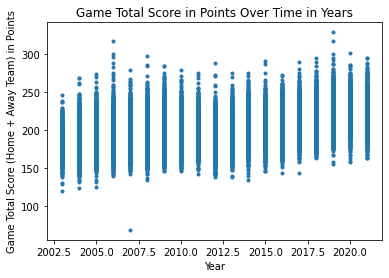

In [9]:
plt.plot(df['year'], df['total_score'], '.')
plt.xlabel("Year")
plt.ylabel("Game Total Score (Home + Away Team) in Points")
plt.title("Game Total Score in Points Over Time in Years")

From this chart we can see a general uptick in scoring during our time period. But with all these data points it can be hard to see. 

### Section 3.2: Average Scoring per Year

Let’s get the average score per year so there's only one point for each year. 

Text(0.5, 1.0, 'Average Score per Game in Points Over Time in Years')

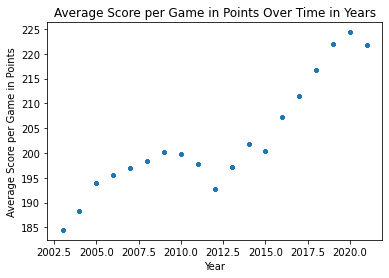

In [10]:
df['x_mean'] = df.groupby('year').total_score.transform(lambda s: s.mean())
plt.plot(df['year'], df['x_mean'], '.')
plt.xlabel("Year")
plt.ylabel("Average Score per Game in Points")
plt.title("Average Score per Game in Points Over Time in Years")